# EDA

### Contents
1. Size of dataset & Number of label & t-test
2. Distribution of data where x axis = Mean of acceleration measured by a sensor in chest. 
3. Boxplot where x axis is same with above.  
4. Distribution of data using 2 features, Mean and std of acceleration measured by a sensor in chest. 
5. Distribution of data where x axis = Mean of magnetometer measured by a sensor in left ankle.  
6. Boxplot where x axis is same with above.  
7. Distribution of data using 2 features, Mean of acceleration measured by a sensor in chest and of magnetometer measured by a sensor in left ankle.  
8. Conclusion.


### The activity set is listed in the following:

 L1: Standing still (1 min)   
 L2: Sitting and relaxing (1 min)   
 L3: Lying down (1 min)   
 L4: Walking (1 min)   
 L5: Climbing stairs (1 min)   
 L6: Waist bends forward (20x)   
 L7: Frontal elevation of arms (20x)  
 L8: Knees bending (crouching) (20x)  
 L9: Cycling (1 min)  
 L10: Jogging (1 min)  
 L11: Running (1 min)  
 L12: Jump front & back (20x)  

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### 1.1 Size of dataset

In [2]:
dataset1 = pd.read_csv('Dataset1.csv')
dataset2 = pd.read_csv('Dataset2.csv')
dataset3 = pd.read_csv('Dataset3.csv')

In [3]:
datasets = [dataset1, dataset2, dataset3]
for i,dataset in enumerate(datasets):
    print('Length of dataset' + str(i+1)+' :',len(dataset))

Length of dataset1 : 302008
Length of dataset2 : 68588
Length of dataset3 : 34402


In [4]:
labels =[
    'Standing still',
    'Sitting and relaxing',
    'Lying down',
    'Walking',
    'Climbing stairs',
    'Waist bends forward',
    'Frontal elevation of arms',
    'Knees bending (crouching)',
    'Cycling',
    'Jogging',
    'Running',
    'Jump front & back',
]

In [5]:
dataset2.head(3)

,Mag_acc_chest_mean,Mag_acc_left_ankle_mean,Mag_gyro_left_ankle_mean,Mag_magneto_left_ankle_mean,Mag_acc_right_lower_arm_mean,Mag_gyro_right_lower_arm_mean,Mag_magneto_right_lower_arm_mean,lead1_mean,lead2_mean,Mag_acc_chest_std,...,lead2_median,Mag_acc_chest_etr,Mag_acc_left_ankle_etr,Mag_gyro_left_ankle_etr,Mag_magneto_left_ankle_etr,Mag_acc_right_lower_arm_etr,Mag_gyro_right_lower_arm_etr,Mag_magneto_right_lower_arm_etr,label,subject
0,9.799068,9.863101,1.031885,1.283169,9.756313,0.997538,0.689380,0.028886,-0.023444,0.056647,...,-0.023025,3.321904,3.321909,3.321890,3.295995,3.321917,3.321928,3.257426,1,1
1,9.730536,9.840348,1.031343,1.123577,9.835149,0.998946,0.955677,-0.030560,-0.068655,0.084156,...,-0.041863,3.321874,3.321886,3.321913,3.298009,3.321844,3.321921,3.162013,1,1
2,9.722070,9.835596,1.036935,1.050011,9.819929,0.999793,1.450012,-0.019257,-0.025955,0.092450,...,-0.012559,3.321863,3.321893,3.321904,3.311754,3.321790,3.321913,3.219169,1,1


### 1.2 Number of label

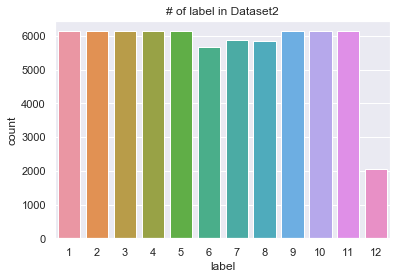

In [6]:
sns.countplot(dataset2.label)
plt.title('# of label in Dataset2')
plt.show()

Number of label 12, jump is the smallest. 

In [7]:
group_by_label_train = []
for i in range(1,13):
    group_by_label_train.append(dataset2[dataset2['label'] == i])

In [8]:
#Load the library for Statistical testing
from scipy.stats import ttest_ind
#df, ttest,pval = sm.stats.ttest_ind(data['newspaper'],data['radio'])
ttest,pval = ttest_ind(dataset1.drop(['subject','label'],axis = 1),dataset2.drop(['subject','label'],axis = 1))

if len(pval[pval<0.05]) == len(pval) :
    print("we reject null hypothesis")
else : print("we fail to reject (accept) null hypothesis")

we fail to reject (accept) null hypothesis


Since we fail to reject the null hypothesis, we may say that dataset1,2 are not statistically different.

In [9]:
#Load the library for Statistical testing
from scipy.stats import ttest_ind
#df, ttest,pval = sm.stats.ttest_ind(data['newspaper'],data['radio'])
ttest,pval = ttest_ind(dataset1.drop(['subject','label'],axis = 1),dataset3.drop(['subject','label'],axis = 1))

if len(pval[pval<0.05]) == len(pval) :
    print("we reject null hypothesis")
else : print("we fail to reject (accept) null hypothesis")

we fail to reject (accept) null hypothesis


Since we fail to reject the null hypothesis, we may say that dataset1,3 are not statistically different.

In [10]:
#Load the library for Statistical testing
from scipy.stats import ttest_ind
#df, ttest,pval = sm.stats.ttest_ind(data['newspaper'],data['radio'])
ttest,pval = ttest_ind(dataset2.drop(['subject','label'],axis = 1),dataset3.drop(['subject','label'],axis = 1))

if len(pval[pval<0.05]) == len(pval) :
    print("we reject null hypothesis")
else : print("we fail to reject (accept) null hypothesis")

we fail to reject (accept) null hypothesis


Since we fail to reject the null hypothesis, we may say that dataset2,3 are not statistically different.    
From this, I think that dataset1,2,3 are not statistically different.

### 2. Distribution of data where x axis = Mean of acceleration measured by a sensor in chest

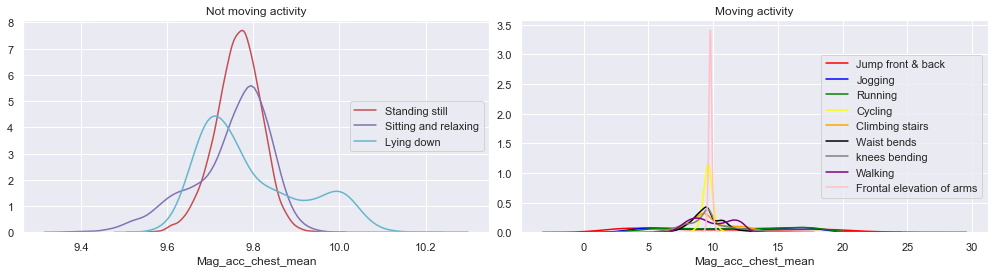

In [11]:
# Reference : https://github.com/UdiBhaskar/Human-Activity-Recognition--Using-Deep-NN

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Not moving activity')
sns.distplot(group_by_label_train[0]['Mag_acc_chest_mean'],color = 'r',hist = False, label = 'Standing still')
sns.distplot(group_by_label_train[1]['Mag_acc_chest_mean'],color = 'm',hist = False,label = 'Sitting and relaxing')
sns.distplot(group_by_label_train[2]['Mag_acc_chest_mean'],color = 'c',hist = False, label = 'Lying down')
plt.legend(loc='right')
plt.xlabel('Mag_acc_chest_mean')

plt.subplot(2,2,2)
plt.title('Moving activity')
sns.distplot(group_by_label_train[11]['Mag_acc_chest_mean'],color = 'red',hist = False, label = 'Jump front & back')
sns.distplot(group_by_label_train[9]['Mag_acc_chest_mean'],color = 'blue',hist = False,label = 'Jogging')
sns.distplot(group_by_label_train[10]['Mag_acc_chest_mean'],color = 'green',hist = False, label = 'Running')
sns.distplot(group_by_label_train[8]['Mag_acc_chest_mean'],color = 'yellow',hist = False, label = 'Cycling')
sns.distplot(group_by_label_train[4]['Mag_acc_chest_mean'],color = 'orange',hist = False, label = 'Climbing stairs')
sns.distplot(group_by_label_train[5]['Mag_acc_chest_mean'],color = 'black',hist = False, label = 'Waist bends')
sns.distplot(group_by_label_train[7]['Mag_acc_chest_mean'],color = 'gray',hist = False, label = 'knees bending')
sns.distplot(group_by_label_train[3]['Mag_acc_chest_mean'],color = 'purple',hist = False, label = 'Walking')
sns.distplot(group_by_label_train[6]['Mag_acc_chest_mean'],color = 'pink',hist = False, label = 'Frontal elevation of arms')
plt.legend(loc='center right')
plt.xlabel('Mag_acc_chest_mean')

plt.tight_layout()
plt.show()

This figure uses KDE(kernel density estimation)
Range of most moving activities is wider than that of not moving activities on mean of acceleration measured by a sensor in chest(x-axis).  
Some moving activities has a similiar range with not moving activities (e.g. Cycling, Frontal elevation of arms)  

### 3. Boxplot

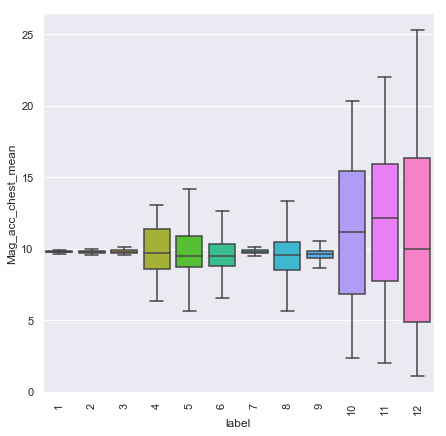

In [12]:
train = dataset2.copy()
plt.figure(figsize=(7,7))
sns.boxplot(x='label', y='Mag_acc_chest_mean',data=train, showfliers=False, saturation=1)
plt.ylabel('Mag_acc_chest_mean')
plt.xticks(rotation=90)
plt.show()

 A range of standing still, sitting and relaxing, lying down, frontal elevation of arms, cycling is very narrow.  
The reason, I think, is that acceleration is generated by movement, but they doesn't use pectoral muscles, related with chest.    
  
 As a result, there is hardly movement, so small value is reflected to acceleration of gravity.  
It can be checked in KDE.

### 4. Distribution of data using 2 features, Mean and std of acceleration measured by a sensor in chest 

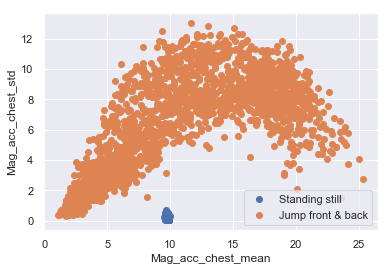

In [13]:
plt.plot(group_by_label_train[0]['Mag_acc_chest_mean'], group_by_label_train[0]['Mag_acc_chest_std'],'o')
plt.plot(group_by_label_train[11]['Mag_acc_chest_mean'], group_by_label_train[11]['Mag_acc_chest_std'],'o')
plt.legend(['Standing still','Jump front & back'] )
plt.xlabel('Mag_acc_chest_mean')
plt.ylabel('Mag_acc_chest_std')
plt.show()

Even if number of jump is the smallest, it has a more various values than standing.

### 5. Distribution of data where x axis = Mean of magnetometer measured by a sensor in left ankle.

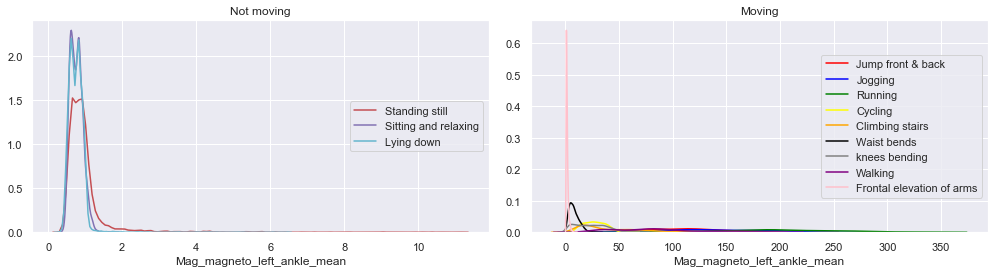

In [14]:
# Reference : https://github.com/UdiBhaskar/Human-Activity-Recognition--Using-Deep-NN

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Not moving')
sns.distplot(group_by_label_train[0]['Mag_magneto_left_ankle_mean'],color = 'r',hist = False, label = 'Standing still')
sns.distplot(group_by_label_train[1]['Mag_magneto_left_ankle_mean'],color = 'm',hist = False,label = 'Sitting and relaxing')
sns.distplot(group_by_label_train[2]['Mag_magneto_left_ankle_mean'],color = 'c',hist = False, label = 'Lying down')
plt.legend(loc='right')
plt.xlabel('Mag_magneto_left_ankle_mean')

plt.subplot(2,2,2)
plt.title('Moving')
sns.distplot(group_by_label_train[11]['Mag_magneto_left_ankle_mean'],color = 'red',hist = False, label = 'Jump front & back')
sns.distplot(group_by_label_train[9]['Mag_magneto_left_ankle_mean'],color = 'blue',hist = False,label = 'Jogging')
sns.distplot(group_by_label_train[10]['Mag_magneto_left_ankle_mean'],color = 'green',hist = False, label = 'Running')
sns.distplot(group_by_label_train[8]['Mag_magneto_left_ankle_mean'],color = 'yellow',hist = False, label = 'Cycling')
sns.distplot(group_by_label_train[4]['Mag_magneto_left_ankle_mean'],color = 'orange',hist = False, label = 'Climbing stairs')
sns.distplot(group_by_label_train[5]['Mag_magneto_left_ankle_mean'],color = 'black',hist = False, label = 'Waist bends')
sns.distplot(group_by_label_train[7]['Mag_magneto_left_ankle_mean'],color = 'gray',hist = False, label = 'knees bending')
sns.distplot(group_by_label_train[3]['Mag_magneto_left_ankle_mean'],color = 'purple',hist = False, label = 'Walking')
sns.distplot(group_by_label_train[6]['Mag_magneto_left_ankle_mean'],color = 'pink',hist = False, label = 'Frontal elevation of arms')
plt.legend(loc='center right')
plt.xlabel('Mag_magneto_left_ankle_mean')

plt.tight_layout()
plt.show()

A range of most moving activities is wider than not moving activities on mean of magnitude for magnetometer in left ankle.  
Some moving activities has a similar range with not moving activities (e.g. Frontal elevation of arms)  

### 6. Boxplot

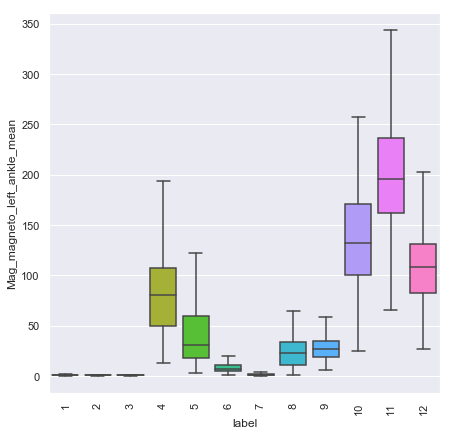

In [15]:
train = dataset2.copy()
plt.figure(figsize=(7,7))
sns.boxplot(x='label', y='Mag_magneto_left_ankle_mean',data=train, showfliers=False, saturation=1)
plt.ylabel('Mag_magneto_left_ankle_mean')
plt.xticks(rotation=90)
plt.show()

Standing, sitting, lying down, frontal elevation of arms have very narrow range.  
The reason may be similar.

### 7. Distribution of data using 2 features, Mean of acceleration measured by a sensor in chest and of magnetometer measured by a sensor in left ankle

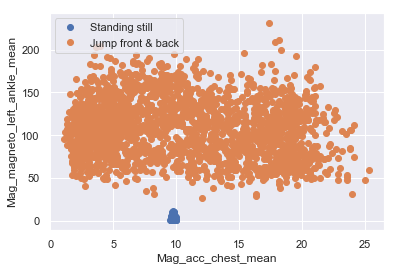

In [16]:
plt.plot(group_by_label_train[0]['Mag_acc_chest_mean'], group_by_label_train[0]['Mag_magneto_left_ankle_mean'],'o')
plt.plot(group_by_label_train[11]['Mag_acc_chest_mean'], group_by_label_train[11]['Mag_magneto_left_ankle_mean'],'o')
plt.legend(['Standing still','Jump front & back'] )
plt.xlabel('Mag_acc_chest_mean')
plt.ylabel('Mag_magneto_left_ankle_mean')
plt.show()

Result is similar. Jump uses leg, but this activity affects a sensor in chest.  
Therefore, jump has a more various values than standing. 

### 8. Conclusion
If an activity is moving and requires related muscle which has a sensor, range of value by the sensor is wide.  
Also range of value for unrelated muscle is high, if the unrelated muscle is affected by external forces 